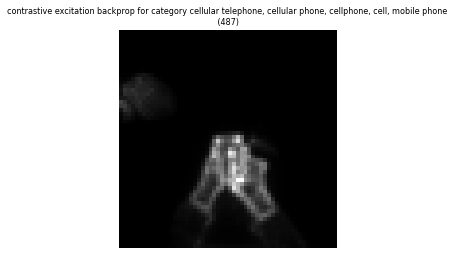

In [2]:
from torchray.attribution.excitation_backprop import contrastive_excitation_backprop
from torchray.benchmark import get_example_data, plot_example

# Obtain example data.
model, x, category_id, _ = get_example_data()

# Contrastive excitation backprop.
saliency = contrastive_excitation_backprop(
    model,
    x,
    category_id,
    saliency_layer='features.9',
    contrast_layer='features.30',
    classifier_layer='classifier.6',
)

# Plots.
plot_example(x, saliency, 'contrastive excitation backprop', category_id)

In [ ]:
from torchray.attribution.deconvnet import deconvnet
from torchray.benchmark import get_example_data, plot_example

# Obtain example data.
model, x, category_id, _ = get_example_data()

# DeConvNet method.
saliency = deconvnet(model, x, category_id)

# Plots.
plot_example(x, saliency, 'deconvnet', category_id)

In [ ]:
from torchray.attribution.excitation_backprop import excitation_backprop
from torchray.benchmark import get_example_data, plot_example

# Obtain example data.
model, x, category_id,_ = get_example_data()

# Contrastive excitation backprop.
saliency = excitation_backprop(
    model,
    x,
    category_id,
    saliency_layer='features.9',
)

# Plots.
plot_example(x, saliency, 'excitation backprop', category_id)

In [ ]:
from torchray.attribution.extremal_perturbation import extremal_perturbation, contrastive_reward
from torchray.benchmark import get_example_data, plot_example

# Obtain example data.
model, x, category_id_1, category_id_2 = get_example_data()
print(x.shape)
# Extremal perturbation backprop.
masks_1, _ = extremal_perturbation(

    model, x, category_id_1,
    reward_func=contrastive_reward,
    debug=True,
    areas=[0.05],
)

#masks_2, _ = extremal_perturbation(
    #model, x, category_id_2,
    #reward_func=contrastive_reward,
    #debug=True,
    #areas=[0.05],
#)

# Plots.
plot_example(x, masks_1, 'extremal perturbation', category_id_1)
#plot_example(x, masks_2, 'extremal perturbation', category_id_2)

In [ ]:
from torchray.attribution.common import Probe, get_module
from torchray.attribution.grad_cam import gradient_to_grad_cam_saliency
from torchray.benchmark import get_example_data, plot_example

# Obtain example data.
model, x, category_id, _ = get_example_data()

# Grad-CAM backprop.
saliency_layer = get_module(model, 'features.29')

probe = Probe(saliency_layer, target='output')

y = model(x)
z = y[0, category_id]
z.backward()

saliency = gradient_to_grad_cam_saliency(probe.data[0])

# Plots.
plot_example(x, saliency, 'grad-cam backprop', category_id)

In [ ]:
from torchray.attribution.gradient import gradient
from torchray.benchmark import get_example_data, plot_example

# Obtain example data.
model, x, category_id, _ = get_example_data()

# Gradient method.
saliency = gradient(model, x, category_id)

# Plots.
plot_example(x, saliency, 'gradient', category_id)

In [ ]:
from torchray.attribution.common import gradient_to_saliency
from torchray.attribution.guided_backprop import GuidedBackpropContext
from torchray.benchmark import get_example_data, plot_example

# Obtain example data.
model, x, category_id, _ = get_example_data()

# Guided backprop.
x.requires_grad_(True)

with GuidedBackpropContext():
    y = model(x)
    z = y[0, category_id]
    z.backward()

saliency = gradient_to_saliency(x)

# Plots.
plot_example(x, saliency, 'guided backprop', category_id)

In [ ]:
from torchray.attribution.rise import rise
from torchray.benchmark import get_example_data, plot_example
from torchray.utils import get_device

# Obtain example data.
model, x, category_id, _ = get_example_data()

# Run on GPU if available.
device = get_device()
model.to(device)
x = x.to(device)

# RISE method.
saliency = rise(model, x)
saliency = saliency[:, category_id].unsqueeze(0)

# Plots.
plot_example(x, saliency, 'RISE', category_id)